In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns
palette = 'colorblind'
sns.set_palette(palette); sns.set_color_codes(palette)
from plot_post import plot_post  # una función distribuida con la notebook para graficar el a posteriori

# Teorema de Bayes e inferencia estadística

En este curso aprenderemos sobre una forma de hacer estadística llamada usualmente estadística Bayesiana. El nombre se debe a Thomas Bayes (1702-1761) un ministro presbiteriano, y matemático aficionado, quien derivó por primera vez lo que ahora conocemos como el **teorema de Bayes**, el cual fue publicado (postumanente) en 1763. Sin embargo una de las primeras personas en realmente desarrollar métodos Bayesianos, fue Pierre-Simon Laplace (1749-1827), por lo que tal vez sería un poco más correcto hablar de _Estadística Laplaciana_ y no Bayesiana.

Existe otro paradigma estadístico llamado estadística clásica o frecuentista. Si ustedes han tenido un curso de estadística (ya sea en el grado o posgrado) es casi seguro que dicho curso fue sobre métodos frecuentistas (aun cuando esto no haya sido explicitado). Es interesante notar que mientras los orígenes de las estadística Bayesiana se remontan al siglo XVII. Los métodos "_clásicos_" (o frecuentistas) fueron desarrollados principalmente durante el siglo XX! De hecho una de las motivaciones para desarrollar métodos frecuentistas fue un _sentimiento_ e ideología anti-bayesiano.

A lo largo del curso contrastaremos algunas de las diferencias y similitudes entre ambas aproximaciones a la estadística, pero sin hacer demasiado incapié en estas diferencias. Mucho se ha escrito sobre las ventajas y desventajas de métodos frecuentistas y Bayesianos, discusión que considero sumamente interesante. Pero para el curso he adoptado un posición más pragmática y nos centraremos en _como_ hacer estadística Bayesiana sin entrar demasiado en la discusión filosófico/matemática sobre el tema. Sin embargo he intentado proveer de referencias a material donde se da esta discusión para que quien así lo desee pueda informarse.

## Estadística Frecuentista vs Bayesiana

Bajo cualquier paradigma estadístico encontraremos los siguientes elementos:

1. Algunas cantidades que son desconocidas, pero queremos conocer. Estas cantidades son llamadas **parámetros**
2. Algunas cantidades son observadas y sospechamos contienen información sobre los parámetros: Estas cantidades son llamadas **datos** 
3. Una (o más) construcciones matemáticas que relacionan los datos con los parámetros. Estos son los llamados **modelos**.

En un paradigma frecuentista los datos son considerados aleatorios. La razón es que cada vez que realizamos un experimento u observación obtenemos valores diferentes para los datos. Por el contrario se considera que existen valores verdaderos para los parámetros y que estos valores son fijos, es por ello que en estadística frecuentista las estimaciones se condicionan sobre los parámetros, es decir el modelo general en estadística frecuentista es:

$$f(\boldsymbol{y} | \hat \theta)$$

Donde el modelo $f$ acepta como argumentos los datos $\boldsymbol{y}$ condicionados (recordemos que el simbolo $|$ es usado para indicar una probabilidad condicional) a valores particulares de $\hat \theta$, usamos el símbolo $\hat {}$, para recalcar que nos referimos a una estimación puntual.

La inferencia frecuentista típicamente involucra el uso de **estimadores** para los parámetros desconocidos. Los estimadores se eligen de acuerdo a diversos criterios de optimalidad, es decir se eligen por que poseen propiedades _óptimas_ según algún criterio, como pueden ser  insesgadez, eficiencia, convergencia y robustez (consistencia).

Supongamos que hemos recolectado datos sobre la prevalencia de alguna enfermedad en una población dada. Hemos recolectado datos de $n$ pacientes de los cuales $y$ han sido diagnosticados con la enfermedad. Un estimador frecuentista de la prevalencia $\hat p$ de dicha enfermedad será:

$$\hat p = \frac{\boldsymbol{y}}{n}$$

¿Por qué esta función en particular? Si bien la respuesta es tan intuitiva que parece _obvia_ es posible justificar (matemáticamente) el uso de ese estimador ya que puede demostrarse que este estimador provee de una estimación no-sesgada (no sobreestima ni subestima a $p$) y con mínima varianza (la dispersión respecto del valor real de $p$ es mínima). 

En el universo frecuentista cada vez que se quiere estimar una cantidad es necesario introducir nuevos estimadores.

### El universo Bayesiano

En el universo Bayesiano los datos son considerados fijos. En el sentido que aún si los concebimos como variables aleatorias una vez que los datos son recolectados estos ya no cambian. Los parámetros de nuestro modelo son considerados aleatorios, no por que necesariamente lo sean si no por que desconocemos los valores que pueden tomar. El grado de incertidumbre sobre los valores desconocidos se modela usando probabilidades. Por lo tanto en estadística Bayesiana lo que nos suele interesar determinar es:

$$p(\boldsymbol{\theta} | \boldsymbol{y})$$

Es decir la probabilidad de que $\boldsymbol{\theta}$ tome ciertos valores dado (o condicionado en) los valores observados de $\boldsymbol{y}$. En algún momento de la historia la estadistica Bayesiana recibió el nombre de **probabilidad inversa**, ya que infiere a partir de las observaciones los parámetros. Es importante notar que $\boldsymbol{\theta}$ es un vector, ya que nos referimos a la distribución de posibles valores que pueda tomar $\theta$ y no a una estimación puntual.

<br>
Las dos ideas centrales de la estadística Bayesiana son:


1. Las probabilidades son un medida de la incerteza que tenemos sobre _cantidades desconocidas_.

2. Dado un conjunto de datos el teorema de Bayes es la forma adecuada de actualizar los valores para las _cantidades desconocidas_.

Como veremos a lo largo del curso, las _cantidades desconocidas_ tomarán la forma de parámetros de modelos.

##  Interpretación Bayesiana de la probabilidad

Las probabiliades son números entre 0 y 1 (incluyendo ambos extremos). En estadística Bayesiana las probabilidades son usadas para cuantificar la _confianza_ que tenemos en que un evento ocurra. Desde este punto de vista es totalmente razonable preguntar cual es la probabilidad de que la masa de Saturno sea $5 \times 10^{26}$ kg, o hablar sobre la probabilidad de lluvia durante el 25 de Mayo de 1810, o la probabilidad de que mañana amanezca.

La lógica aristotélica permite razonar de forma correcta cuando los enunciados son verdaderos o falsos (cuando hay certezas). A fin de razonar, de forma correcta, en presencia de incertidumbre  es necesario extender la lógica aristotélica. En 1946, Richard Cox demostró que tal extensión es posible si asignamos probabilidades a los enunciados y si las probabilidades usadas respetan las conocidas reglas de la teoría de probabilidades:

La regla de la suma:
$$p(A) + p(A^c) = 1$$ 

La regla del producto:
$$p(A, B) = p(A|B) \times p(B)$$ 

Siendo p(falso)= 0 y p(verdadero) = 1

Si no estamos seguros de la factibilidad de un evento, entonces es matemáticamente razonable asignar un valor entre 0 y 1, de acuerdo al grado de _confianza_ que tenemos de que ocurra dicho evento. 

Dado que las probabilidades son una medida de la incerteza con la que conocemos una cantidad y no necesariamente una propiedad de la naturaleza, distintas personas podrán asignar distintas probabilidades a un mismo evento. Por ello se suele decir que la estadística Bayesiana es subjetiva (y no como un cumplido!). Sin embargo, este uso de las probabilidades simplemente refleja un hecho trivial, distintas personas poseen diferente información (la cual bien podría ser rotulada de _objetiva_) por lo que no necesariamente estarán de acuerdo en el grado de factibilidad de un evento. Una persona que sabe que una moneda está sesgada hacia cara, maneja información distinta de otra que asume que una moneda tiene igual chance de caer cara o seca. De todas formas, si ambas personas hacen el experimento de arrojar esa moneda al aire varias veces, la probabilidad que cada uno asigna al _evento cara_ irá convergiendo a un mismo valor, al menos si se comportan de forma racional. Más adelante realizaremos tal experimento de forma computacional.

Como se verá en el resto del curso la estadística Bayesiana (al menos en su sentido moderno dentro de las ciencias exactas, naturales y sociales) es tan _subjetiva_ u _objetiva_ como los métodos estadísticos no-bayesianos u otros formas de modelado usadas en ciencia.

Para empezar a ponernos un poco más concretos veamos el teorema de Bayes que es la base la estadística Bayesiana.

## El teorema de Bayes

Según la regla del producto tenemos que la probabiliad de que ocurra un evento A y uno B, si ambos son independientes, es igual al producto de sus probabilidades.

$$p(A, B) = p(A) p(B)$$ 

Pero ¿Qué pasa en cuando los eventos no son independientes? En es caso podes decir que:

$$p(A, B) = p(A|B)  p(B)$$ 

$p(A|B)$ es lo que se conoce como probabilidad condicional y se lee _la probabilidad de $A$ dado $B$_. Y representa la probabilidad de que ocurra $A$ dado que sabemos $B$ (o _condicionado_ a que sabemos $B$).

Reordenando la ecuación anterior se ve que:

$$p(A|B) = \frac{p(A, B)}{p(B)}$$ 

Es decir $p(A|B)$ es la probabilidad de que ocurra $A$ y $B$ de forma conjunta ($p(A, B)$), pero relativo a la probabilidad de que ocurra $p(B)$. ¿Por qué dividimos por $p(B)$? Debido a que conocer $B$ equivale a decir que el espacio total de posibilidades se ha reducido a $B$. En el caso particular que $B$ no aporte información sobre $A$ tendremos que:

$$p(A|B) = p(A)$$

Es decir el evento $A$ es independiente de $B$, o lo que es lo mismo elevento $A$ no está condicionado por el evento $B$. En este caso particular recuperamos la expresión desde donde partimos.

$$p(A, B) = p(A) p(B)$$ 

Luego de este pequeño desvío por la probabilidad condicional sigamos nuestro camino.

El teorema de Bayes es una consecuencia directa de la regla del producto, veamos.

$$p(\boldsymbol{\theta}, \boldsymbol{y}) = p(\boldsymbol{\theta}|\boldsymbol{y}) p(\boldsymbol{y})$$
$$p(\boldsymbol{\theta}, \boldsymbol{y}) = p(\boldsymbol{y}|\boldsymbol{\theta}) p(\boldsymbol{\theta})$$

Por lo que podemos escribir que:

$$p(\boldsymbol{\theta}|\boldsymbol{y}) p(\boldsymbol{y}) = p(\boldsymbol{y}|\boldsymbol{\theta}) p(\boldsymbol{\theta})$$

Reordenando llegamos al teorema de Bayes.

$$p(\boldsymbol{\theta}|\boldsymbol{y}) = \frac{p(\boldsymbol{y}|\boldsymbol{\theta}) p(\boldsymbol{\theta})}{p(\boldsymbol{y})}$$

El cual también suele ser escrito de la siguiente forma:

$$p(\boldsymbol{\theta}|\boldsymbol{y}) = \frac{p(\boldsymbol{y}|\boldsymbol{\theta})p(\boldsymbol{\theta})}{\int_{E} p(\boldsymbol{y}|\boldsymbol{\theta})p(\boldsymbol{\theta})}$$

Donde $E$ representa el espacio de parámetros de $\boldsymbol{\theta}$, es decir integramos para todos los valores de $\boldsymbol{\theta}$. La integral es reemplazada por una sumatoria en el caso que estemos hablando de valores continuos y no discretos.

Cada término del teorema de Bayes tiene un nombre específico:

* $p(\boldsymbol{\theta}|\boldsymbol{y})$: _a posteriori_ 
* $p(\boldsymbol{y}|\boldsymbol{\theta})$: _likelihood_ (_verosimilitud_)
* $p(\boldsymbol{\theta})$: _a priori_
* $p(\boldsymbol{y})$: _evidencia_


El **_a priori_** es la forma de introducir conocimiento previo sobre los valores que pueden tomar los parámetros. A veces cuando no sabemos demasiado se suelen usar _a prioris_ que asignan igual probabilidad a todos los valores de los parámetros, otras veces se puede elegir _a prioris_ que restrijan los valores de los parámetros a rangos razonables, algo que se conoce como regularización, por ejemplo solo valores positivos. Muchas veces contamos con información mucho más precisa como medidas experimentales previas o límites impuesto por alguna teoría.

El **_likelihood_** es la forma de incluir nuestros datos en el análisis. Es una expresión matemática que especifica la plausibilidad de los datos. El _likelihood_ es central tanto en estadística Bayesiana como en estadística no-Bayesiana. A medida que la cantidad de datos aumenta el _likelihood_ tiene cada vez más peso en los resultados, esto explica por que a veces los resultados de la estadística Bayesiana y frecuentista coinciden cuando la muestra es _grande_.

El **_a posteriori_** es la distribución de probabilidad para los parámetros. Es la consecuencia lógica de haber usado un conjunto de datos un _likelihood_ y un _a priori_. Se lo suele pensar como la versión actualizada del _a priori_. De hecho un _a posteriori_ puede ser un _a priori_ de un análisis a futuro.

La **_likelihood marginal_** (también llamado _evidencia_) es la probabilidad de observar los datos $\boldsymbol{y}$ promediado sobre todas los posibles hipótesis (o conjunto de parámetros) $\boldsymbol{\theta}$. Si la oración anterior no es muy clara, no hay problema ya veremos ejemplos que harán más claro este concepto. En general, la _evidencia_ puede ser vista como una simple constante de normalización que en la mayoría de los problemas prácticos puede (y suele) omitirse sin perdida de generalidad. Por lo que el teorema de Bayes suele aparecer escrito como:

$$p(\boldsymbol{\theta}|\boldsymbol{y}) \propto p(\boldsymbol{y}|\boldsymbol{\theta}) p(\boldsymbol{\theta})$$


El rol de todos estos términos irá quedando más claro a medida que avancemos.

## El _a posteriori_ como único estimador

El _a posteriori_ representa todo lo que sabemos de un problema, dado un modelo y un conjunto de datos. Y por lo tanto todas las inferencias estadísticas pueden deducirse a partir de el. Tipicamente esto toma la forma de integrales como la siguiente.

$$J = \int \varphi(\boldsymbol{\theta}) p(\boldsymbol{\theta}|\boldsymbol{y}) d\boldsymbol{\theta}$$

Por ejemplo si quisieramos saber la media de \theta deberíamos reemplazar $\varphi(\boldsymbol{\theta})$, por $\boldsymbol{\theta}$ e integrar, por lo que nos quedaría:

$$<\theta> = \int \boldsymbol{\theta} p(\boldsymbol{\theta}|\boldsymbol{y}) d\boldsymbol{\theta}$$

Esto no es más que la definición de un promedio pesado, donde cada valor de $\theta$ es pesado según la probabilidad asignada por el _a posteriori_. Más adelante veremos que al resolver problemas de form computacional aproximaremos este tipo de integrales con sumatorias.

## Estadística Bayesiana en tres pasos

El teorema de Bayes es el único estimador usado en estadística Bayesiana. Por lo que conceptualmente la estadística Bayesiana resulta muy simple. Según [Gelman et al. (2013)](https://www.crcpress.com/Bayesian-Data-Analysis-Third-Edition/Gelman-Carlin-Stern-Dunson-Vehtari-Rubin/p/book/9781439840955) (Inspirando en ideas de George Box) la estadística Bayesiana se reduce a tres pasos:

1. **Crear un modelo probabilístico**. Los modelos probabilísticos son _historias_ que dan cuenta de como se generan los datos observados (o por observar) expresada en términos formales usando distribuciones de probabilidad. A veces, estas _historias_ pueden ser útiles en si mismas, incluso si no conducen a un modelo formal, ya que pueden ser disparadores de nuevas preguntas, o pueden servirnos para cuestionar procemientos o supuestos.

2. **Condicionar el modelo a los datos observados a fin de obtener el _a posteriori_**. Usando el teorema de Bayes se actualizan las probabilidades asignadas _a priori_ de acuerdo a los datos observados obteniendose las probabilidades _a posteriori_. 

3. **Criticar el ajuste del modelo generado a los datos y evaluar las implicancias del modelo**. Se puede demostrar que dada la información previa y los datos observados no existe otro mecanismo capaz de generar una _mejor_ inferencia que la estadística Bayesiana. Esto parece maravilloso, pero hay un problema. Esto solo es cierto si se asumen que los datos y el modelo son correctos. En la práctica, los datos pueden contener errores y los modelos son aproximaciones de fenómeos _reales_ (con suerte!). Mientras más diferente sea un modelo (Bayesiano, o no) a la _realidad_ menos sentido tendrán los resultados de ese modelo. Por lo tanto los modelos deben ser _criticados_ y _validados_ antes de poder generar conclusiones. En general uno debe evaluar si las predicciones generadas por el modelo se ajustan a los datos observados. Es necesario evaluar si las conclusiones obtenidas tienen sentido dado el marco conceptual en el que uno trabaja, cuan sensibles son los resultados a las detalles del modelo (sobre todo a detalles para los cuales no tenemos demasiada información).

## Estimación de un solo parámetro

En la práctica la mayoría de los modelos tendrán más de un parámetro, pero se puede aprender mucho empezando por el caso más sencillo de un solo parámetro, así que eso haremos a continuación.

### El problema de la moneda

A juzgar por la cantidad de ejemplos sobre monedas arrojadas al aires en libros de estadística y probabilidad, pareciera que las monedas son un elementro central de estas disciplinas, algo de cierto hay.

Una de las razones detrás de la ubiquidad de este ejemplo es que las monedas son objetos familiares que facilitan discutir conceptos que de otra forma podrían sonar demasiado abstractos. De todas formas quizá la razón más importante sea que el problema puede ser modelado de forma simple y que muchos problemas _reales_ son conceptualmente similares, de hecho cualquier problema en donde obtengamos resultados binarios, 0/1, enfermo/sano, spam/no-spam, etc, puede ser pensado como si estuvieramos hablando de monedas. En definitiva el modelo que veremos a continuación (ejemplificado con monedas) sirve para cualquier situación en la cual los datos observados solo pueden tomar dos valores mutuamente excluyentes. Debido a que estos valores son nominales y son dos, a este modelo se le llama binomial.

En el siguiente ejemplo trataremos de determinar el grado en que una moneda está sesgada. En general cuando se habla de sesgo se hace referencia a la desviación de algún valor (por ejemplo igual proporción de caras y cecas), pero aquí usaremos el termino _sesgo_ de forma más general. Diremos que el sesgo es un valor en el intervalo [0, 1], siendo 0 para una moneda que siempre cae ceca y 1 para una moneda que siempre cae cara y lo representaremos con la variable $\theta$. A fin de cuantificar $\theta$ arrojaremos una moneda al aire repetidas veces, por practicidad arrojaremos la moneda de forma computacional (pero nada nos impide hacerlo manualmente!). Llevaremos registro del resultado en la variable $y$. Siendo $y$ la cantidad de caras obtenidas en un experimento.

Habiendo definido nuestro problema debemos expresarlo en términos del teorema de Bayes,

$$p(\boldsymbol{\theta}|y) \propto p(y| \boldsymbol{\theta}) p(\boldsymbol{\theta})$$

Donde, como dijimos $\theta = 1$ quiere decir 100% cara y $\theta = 0$ 100% ceca.

Ahora solo restar reemplazar los dos términos a la derecha de la igualdad, el _a priori_ y el _likelihood_,  por distribuciones de probabilidad _adecuadas_ y luego multiplicarlas para obtener el término a la inzquierda, el _a posteriori_. Como es la primera vez que haremos esto, lo haremos paso a paso y analíticamente. En el próximo capítulo veremos como hacerlo computacionalmente.

#### Definiendo el _a priori_

El _a priori_ lo modelaremos usando una distribución beta, que es una distribución muy usada en estadística Bayesiana. La $pdf$ de esta distribución es:

$$
p(\theta)= \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\, \theta^{\alpha-1}(1-\theta)^{\beta-1}
$$

El primer término es una constante de normalización. Por suerte para nuestro problema nos basta con establecer una proporcionalidad, por lo que podemos simplificar esta expresión y escribir la distribución beta de la siguiente forma.

$$
p(\theta) \propto  \theta^{\alpha-1}(1-\theta)^{\beta-1}
$$

Hay varias razones para usar una distribución beta para este y otros problemas:

* La distribución beta varía entre 0 y 1, de igual forma que lo hace $\boldsymbol{\theta}$ en nuestro modelo.
* Esta distribución combinada con la que eligiremos como _likelihood_ (ver más adelante), nos permitirá resolver el problema de forma analítica.
* Es una distribución versatil para expresar distintas situaciones. 

Respecto al último punto, veamos un ejemplo. Supongamos que el experimento de la moneda es realizado por tres personas. Una de ellas dice no saber nada de la moneda por lo tanto _a priori_ todos los valores de $\theta$ son igualmente probables. La segunda persona desconfía de la moneda, ya que sospecha que es una moneda trucada, por lo tanto considera que está sesgada, pero no sabe si hacia cara o hacia ceca. Por último, la tercer persona asegura que lo más probable es que $\theta$ tome un valor alrededor de 0.5 ya que según su experiencia así es como se comportan las monedas. Todas estas situaciones pueden ser modeladas por la distribución beta, como se ve a continuación.

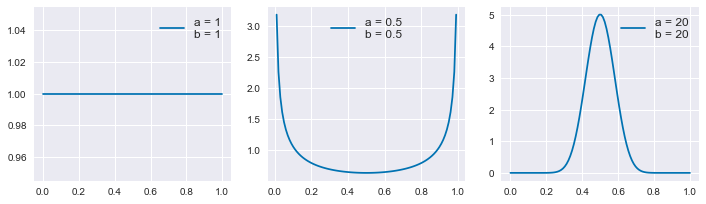

In [2]:
plt.figure(figsize=(10, 3))
x = np.linspace(0, 1, 100)

for ind, (a, b) in enumerate([(1, 1), (0.5, 0.5), (20, 20)]):
    y = stats.beta.pdf(x, a, b)
    plt.subplot(1, 3, ind+1)
    plt.plot(x, y, label='a = %s\nb = %s' % (a, b))
    plt.legend(fontsize=12)
plt.tight_layout();

####  Definiendo el _likelihood_

Habiendo definido el _a priori_ veamos ahora el likelihood. Asumiendo que el resultado obtenido al arrojar una moneda no influye en el resultado de posteriores experimentos (es decir los experimentos son independientes entre si) es razonable utilizar como likelihood la distribución binomial.

$$p(y|\theta) = \frac{N!}{y!(N-y)!} \theta^y (1 - \theta)^{N−y}$$

Donde N es la cantidad total de experimentos (monedas arrojadas al aire) e $y$ es la cantidad de caras obtenidas. A los fines prácticos podríamos simplificar la igualdad anterior y convertirla en una proporcionalidad, eliminando el término $\frac{N!}{y!(N-y)!}$ ya que ese término no depende de $\theta$ que es lo que nos interesa averiguar. Por lo que podríamos establecer que:

$$p(y|\theta) \propto \theta^y (1 - \theta)^{N−y}$$

La elección de esta distribución para modelar nuestro problema es razonable ya que $\theta$ es la chance de obtener una cara al arrojar una moneda y ese hecho ha ocurrido $y$ veces, de la misma forma $1-\theta$ es la chance de obtener seca lo cual ha sido observado $N-y$ veces.

#### Obteniendo el _a posteriori_

Se puede demostrar que siempre que usemos como _a priori_ una función beta y como _likelihood_ una distribución binomial obtendremos como resultado un _a posteriori_ que será nuevamente una distribución beta con los siguientes parámetros:

$$p(\theta|y) \propto \operatorname{Beta}(\alpha_{a priori} + y, \beta_{a priori} + N - y)$$

Veamos de donde surge este resultado, según el teorema de Bayes el _a posteriori_ es el producto del _likelihood_ y el _a priori_.

$$p(\theta|y) \propto p(y|\theta) p(\theta)$$

Por lo tanto, en nuestro caso tendremos que:

$$
p(\theta|y) \propto \theta^y (1 - \theta)^{N−y} \theta^{\alpha-1}(1-\theta)^{\beta-1}
$$

Reordenando, obtenemos que el _a posteriori_ es:

$$
p(\theta|y) \propto \theta^{\alpha-1+y}(1-\theta)^{\beta-1+N−y}
$$

Esto es una distribución Beta (sin considerar la constante de normalización).

Cuando se cumple que para un cierto _likelihood_ la forma funcional del _a priori_ y la del _a posteriori_ coinciden se dice que el _a priori_ es conjugado con el _likelihood_. Historicamente los problemas en estadística Bayesiana estuvieron restringidos al uso de _a prioris_ conjugados, ya que estos garantizan la tratabilidad matemática del problema, es decir garantizan que es posible obtener una expresión analítica para nuestro problema. En el próximo capítulo veremos técnicas computacionales modernas que permiten obtener _a posterioris_ incluso cuando no se usan _a prioris_ conjugados, lo que ha permitido el resurgimiento de la estadística Bayesiana en las últimas décadas.

#### Notación y visualización de modelos Bayesianos

Para representar modelos en estadística Bayesiana (y en probabilidad en general) se suele utilizar la siguiente notación

$$\mathbf{\theta} \sim \operatorname{Beta}(\alpha, \beta)$$
$$\mathbf{y}\sim \operatorname{Bin}(n=1, p=\theta)$$

El símbolo $\sim$ indica que la variable a la izquierda se distribuye según la distribución a la derecha. Entonces podríamos decir que $\mathbf{\theta}$ es una variable aleatoria con distribución beta, y que beta está definida por los parámetros $\alpha$ y $\beta$, este es nuestro _a priori_. En la siguiente linea tenemos el _likelihood_ el cual está definido por una distribución binomial con parámetros $n=1$ y $p=\boldsymbol{\theta}$. Notese que tanto $\boldsymbol{\theta}$ como $\boldsymbol{y}$ son vectores, en algunos textos se usa una notación alternativa usando escalares y subíndices como por ejemplo $y_i$.

Gráficamente esto se puede representar usando los diagramas de Kruschke:


<img src="imagenes/modelo_1_moneda.png" width=350>

En el primer nivel (de arriba hacia abajo) se observa el _a priori_, luego el likelihood, y por último los datos. Las flechas indican la vinculación entre las partes del modelo y el signo $\sim$ la naturaleza estocástica de las variables.

####  Obteniendo los datos

Bien, ahora que sabemos como calcular el _a posteriori_, lo único que resta es conseguir los datos. En este ejemplo los datos son sintéticos, es decir los obtuve computacionalemnte mediante un generador de números (pseudo)aleatorios, pero bien podrían haber surgido de un experimento con una moneda _real_.

#### Calculando el _a posteriori_

En el próximo capítulo veremos como usar métodos computacionales para computar un _a posteriori_ sin necesidad de derivarlo analíticamente. Esto es lo que haremos para resolver el resto de los problemas del curso. Pero dado que ya nos tomamos el trabajo de derivar analíticamente la expresión para el _a posteriori_ vamos a usar esa expresión. Si miran el código de la siguiente celda verán que la mayoría de las lineas se encargan de dibujar los resultados y no de calcularlos. El cálculo del _a posteriori_ ocurre en las lineas 18, 22 y 26. Cada una linea de estas lineas computa el _a posteriori_ para cada uno de los _a prioris_ que vimos antes. El cálculo es simple, tan solo se computa el valor del _a posteriori_ (usando la función _pdf_ de la distribución beta provista por SciPy) para 100 puntos igualmente espaciados entre 0 y 1 (linea 7). El loop de empieza en la linea 9 se debe a que exploraremos como cambian las distribuciones _a posteriori_ para distinta cantidad de datos (*n_intentos*). Con una linea negra punteada y vertical se indica el valor real de $\theta$, calor que por supuesto es desconocido en una situación real, pero conocido para mi ya que los datos son sintéticos.

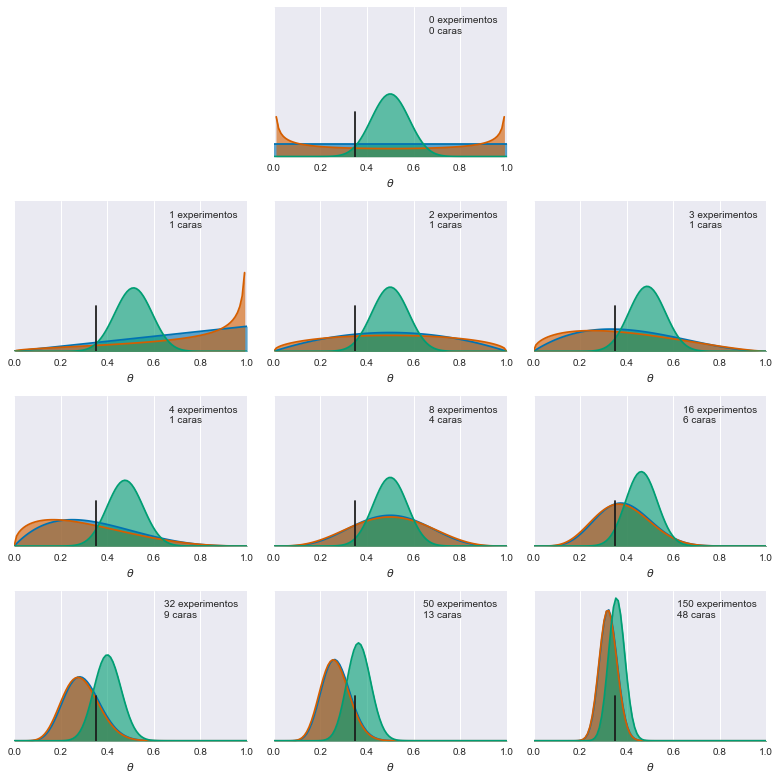

In [3]:
plt.figure(figsize=(11, 11))

theta_real = 0.35
n_intentos = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
datos = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]

beta_params = [(1, 1), (0.5, 0.5), (20, 20)]
dist = stats.beta
x = np.linspace(0, 1, 100)

for idx, N in enumerate(n_intentos):
    if idx == 0:
        plt.subplot(4,3, 2)
    else:
        plt.subplot(4,3, idx+3)
    y = datos[idx]
    for (a_prior, b_prior), c in zip(beta_params, ('b', 'r', 'g')):
        p_theta_dado_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.plot(x, p_theta_dado_y, c)
        plt.fill_between(x, 0, p_theta_dado_y, color=c, alpha=0.6)

    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label="{:d} experimentos\n{:d} caras".format(N, y), alpha=0)
    plt.xlim(0,1)
    plt.ylim(0,12)
    plt.xlabel(r"$\theta$") 
    plt.legend()
    plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()

#### Analizando los resultados

La primer figura del panel muestra los *a priori*, nuestra estimación de $\theta$ dado que no hemos realizado ningún experimento. Las sucesivas nueve figuras muestras las distribuciones *a posteriori* y se indica la cantidad de experimentos y de caras obtenidas. Además se puede ver una linea negra vertical en 0.35, la cual representa el valor verdadero de $\theta$. Por supuesto que en problemas reales este valor es desconocido.

Este ejemplo es realmente ilustrativo en varios aspectos.

* El resultado de un análisis Bayesiano NO es un solo valor, si no una distribución (_a posteriori_) de los valores plausibles de los parámetros (dado los datos y el modelo).
* La dispersión o ancho de las curvas es una medida de la incertidumbre sobre los valores.
* El valor más probable viene dado por la moda de la distribución (el _pico_ de la distribución).
* Aún cuando $\frac{2}{1} = \frac{8}{4}$ son numéricamente iguales tenemos menor incertidumbre en un resultado cuando el número de experimentos es mayor.
* Dada una cantidad _suficiente_ de datos los resultados tienden a converger sin importar el _a priori_ usado.
* La rapidez con la que los resultados convergen varía. En este ejemplo las curvas azul y roja parecen converger con tan solo 8 experimentos, pero se necesitan más de 50 experimentos para que las tres curvas se muestren similares. Aún con 150 experimentos se observan ligeras diferencias.
* Partiendo de los _a priori_ unifome (azul) o sesgado (rojo) y habiendo realizado un solo experimento y observado una sola cara, lo más razonable es pensar que estamos frente a una moneda con dos caras!
* La situación cambia drásticamente al ver por primera vez una moneda caer ceca. Ahora lo más probable (dado cualquiera de los tres *a prioris*) es inferir que $\theta=0.5$. Los valores de $\theta$ exactamente 0 o 1 se vuelven imposibles.
* El a priori no sesgado (verde) es más informativo que los otros dos (la distribución esta más concentrada), por ello se requiere de un número mas grande de experimentos para "moverlo".
* El a priori uniforme (azul) es lo que se conoce como no informativo. El resultado de un análisis Bayesiano usando un _a priori_ no-informativos en general coinciden con los resultados de análisis frecuentistas (en este caso el valor esperado de $\theta = \frac{y}{N}$).

##  Influencia y elección del _a priori_

De los ejemplos anteriores debería quedar claro que los _a priori_ influencian los resultados de nuestros cálculos. Esto tiene total sentido si no fuese así no haría falta incluirlos en el análisis y todo sería más simple (aunque nos perderíamos la oportunidad de usar información previa). De los ejemplos anteriores también debería quedar claro que a medida que aumentan los datos (como las tiradas de monedas) los resultados son cada vez menos sensibles al _a priori_. De hecho, para una cantidad infinita de datos el _a priori_ no tiene ningún efecto. Exactamente cuantos datos son necesarios para que el efecto del _a priori_ sea despreciable varía según el problema y los modelos usados. En el ejemplo de la moneda se puede ver que 50 experimentos bastan para hacer que dos de los resultados sean prácticamente indistinguibles, pero hacen falta más de 150 experimentos para que los 3 resultados se vuelvan _practicamente_ independientes del _a priori_. Esto es así por que los dos primeros _a prioris_ son relativamente _planos_, mientras que el tercer _a priori_ concentra casi toda la probabilidad en una región relativamente pequeña. El tercer a priori no solo considera que el valor más probable de $\theta$ es 0.5, si no que considera que la mayoría de los otros valores son muy poco probables. ¿Cómo cambiarían los resultados si hubiéramos usado como _a priori_ $\operatorname{Beta}(\alpha=2, \beta=2)$?

La elección de los _a priori_ puede poner nervioso a quienes se inician en el análisis Bayesiano (o a los detractores de este paradigma). El temor es que los _a prioris_ censuren a los datos y no les permitan _hablar por si mismos_! Eso esta muy bien, pero el punto es que los datos no saben hablar, con suerte murmuran. Los datos solo tienen sentido a la luz de los modelos (matemáticos y mentales) usados para interpretarlos, y los _a prioris_ son parte de esos modelos. 

Hay quienes prefieren usar _a priori_ no-informativos (también conocidos como _a priori_ planos,
vagos, o difusos). Estos _a priori_ aportan la menor cantidad posible de información y por lo tanto tienen el menor impacto posible en el análisis. Si bien es posible usarlos, en general hay razones prácticas para no-preferirlos. En este libro sequimos las recomendaciones de Gelman, McElreath, Kruschke y otros y usaremos _a priori ligeramente informativos_. En muchos problemas sabemos al menos algo de los valores posibles que pueden tomar nuestros parámetros, por ejemplo que solo pueden ser positivos, o que están restringidos a sumar 1 o el rango aproximado, etc. En esos casos podemos usar _a prioris_ que introduzcan esta _ligera_ información. En estos casos podemos pensar que la función del _a priori_ es la de mantener las inferencias dentro de límites razonables. Estos _a priori_ se suelen llamar regularizadores.


Por supuesto que también es posible usar _a prioris informativos_ (o _fuertes_). Hacer esto es razonable solo si contamos con información previa confiable. Esto puede ser ventajoso en casos en que los datos contiene poca información sobre el problema. Si la información no viene por el _likelihood_ (datos), entonces puede venir por el _a priori_.A modo de ejemplo, en bioinformática estructural es común usar toda la información previa posible (de forma Bayesiana y no-Bayesiana) para resolver problemas. Esto es posible por la existencia de bases de datos que almacenan los resultados de cientos o miles experimentos realizados a lo largo de décadas de esfuezo. No usar esta información sería casi-absurdo! En resumen, si contás con información confiable no hay razón para descartarla, menos si el _arguemento_ es algo relacionado con prenteder ser _objetivo_. No hay objetividad en negar lo que se sabe!

Hasta ahora hemos visto que es posible clasificar, aunque sea de forma vaga o aproximada, a los _a priori_ en función de la información que contienen. Pero saber esta clasificación no necesariamente hace las cosas más simples a la hora de elegir un _a priori_. Acaso no sería mejor eliminar los _a prioris_ de nuestro análisis? Eso haría el asunto mucho mas simple. Bueno, el punto es que desde una perspectiva Bayesiana todos los modelos tienen _a prioris_, aun cuando no sean explícitos. De hecho muchos resultados de la estadística frecuentista pueden considerarse casos especiales de modelos Bayesianos usando _a prioris planos_. Volviedo a la figura anterior se puede ver que la moda del _a posteriori_ para la curva azul. Coincide con la estimación (puntual) frecuentista para el valor de $\theta$

$$\hat \theta = {{y} \over {N}}$$

$\hat \theta$ es una estimación puntual (un número) y no una distribución.

Este ejemplo nos muestra que no es posible hacer análisis estadísticos y sacarse los _a prioris_ de encima. Un posible corolario es que es más flexible y transparente especificar los _a prioris_ de forma explícita que esconderlos bajo la cama. Al hacerlo ganamos mayor control sobre nuestro modelo, mayor transparencia y por el mismo precio la estimacíón de la incertidumbre con la que se estima cada parámetro.

Por último, hay que recordar que el modelado estadístico (como otras formas de modelado) es un proceso iterativo e interactivo. Nada nos impide usar más de un _a priori_ (o un likelihood) si así lo quisieramos. Una parte importante del modelado es la de cuestionar los supuestos y los _a prioris_ son simplemente un tipo de supuestos (como lo son los _likelihoods_). Si tuvieramos más de un _a priori_ razonable podríamos realizar un _análisis de sensibilidad_, es decir evaluar como cambian los resultados con los _a prioris_, podríamos llegar a la conclusión que para un rango amplio de _a prioris_ los resultados no varían! Más adelante veremos varias herramientas para comparar distintos modelos.

Dado que los _a prioris_ tienen un papel central en la estadística Bayesiana, seguiremos discutiéndolos como a medida que vayamos viendo problemas concretos. Por lo que si esta discusión no ha aclarado todas tus dudas y seguís algo confundido, mejor mantener la calma y no preocuparse demasiado, este tema ha sido motivo de discusión y confusión durante décadas, y la discusión todavía continua!




## Cuantificando el peso del _a priori_

En general la distribución más familiar para la mayoría de las personas es la distribución Gaussiana, como esta distribución está definida por dos parámetros, la media y la dispersión de ese valor medio, suele resultarnos _natural_ pensar las distribuciones en esos términos. Si queremos expresar la distribución beta en función de la media y la dispersión podemos hacerlo de la siguiente forma:

$$\alpha = \mu \kappa$$
$$\beta = (1 − \mu) \kappa$$

donde $\mu$ es la media y $\kappa$ es un parámetro llamado concentración. Por ejemplo si $\mu=0.5$ y $\kappa=40$, tenemos que:

$$\alpha = 0.5 * 40 = 20$$
$$\beta = (1-0.5) * 40 = 20$$

$\kappa$ se puede interpretar como la cantidad de experimentos si/no que realizamos dándonos como resultado la media $\mu$. Es decir el _a priori_ no sesgado (verde) equivale a haber arrojado una moneda 40 veces y haber obtenido como media 0.5. Es decir que si usamos ese _a priori_ recién al observar 40 experimentos si/no, los datos tendrán el mismo peso relativo que el _a priori_, por debajo de este número el _a priori_ contribuye más que los datos al resultado final y por encima menos. El _a priori_ azul (uniforme) equivale a haber observado a la moneda caer una vez cara y otra vez ceca ($\kappa = 2$). Cuando $\kappa < 2$, la cosa se poco un poco extraña, por ejemplo el _a priori_ sesgado (rojo) equivale a haber observado una sola moneda ($\kappa = 1$) pero en una especie de (a falta de mejor analogía) _superposición cuántica de estados_!

## Resumiendo el  _a posteriori_

El resultado de un análisis Bayesiano es siempre una distribución de probabilidad. En el caso de la moneda esto es evidente, y en el caso del diagnostico es menos claro ya que la distribución es discreta y solo puede tomar dos valores.

A la hora de comunicar los resultados de un análisis Bayesiano, lo más informativo es reportar la distribución completa, aunque esto no siempre es posible o deseable, por ejemplo el _a posteriori_ de una distribución multidimensional es imposible de dibujar en papel. En general, se suele recurrir a distintas medidas que resumen el _a priori_, por ejemplo reportando la media (o mediana o la moda) de la distribución _a posteriori_. Algo un poco más informativo es reportar además un intervalo de credibilidad. Existen varios criterios para definir intervalos de credibilidad, el que usaremos en este curso (y que también es ampliamente usado en la literatura) es lo que se conoce como intervalo de más alta densidad y nos refereriremos a el por su sigla en ingles, HPD (_Highest Posterior Density interval_). Un HPD es el intervalo, más corto, que contiene una porción fija de la densidad de probabilidad, generalmente el 95% (aunque otros valores como 90% o 50% son comunes). Cualquier punto dentro de este intervalo tiene mayor densidad que cualquier punto fuera del intervalo. Para una distribución unimodal, el HPD 95 es simplemente el intervalo entre los percentiles 2,5 y 97,5.

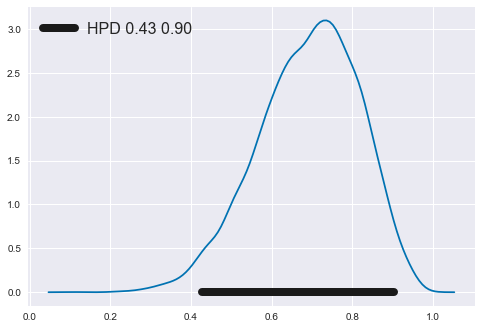

In [4]:
post = dist.rvs(9, 4, size=10000)  # un a posteriori sintético

def naive_hpd(post):
    sns.kdeplot(post)
    HPD = np.percentile(post, [2.5, 97.5])
    plt.plot(HPD, [0, 0], label='HPD {:.2f} {:.2f}'.format(*HPD), linewidth=8, color='k')
    plt.legend(loc=2, fontsize=16);

naive_hpd(post)

Para una distribucion multimodal, el cálculo del HPD es ligeramente más complejo. Veamos por ejemplo que sucede si aplicamos la función *naive_hpd* a una mezcla de gaussianas.

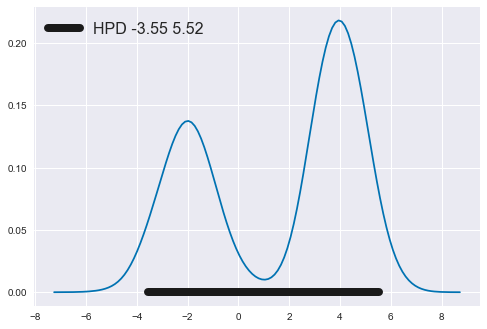

In [5]:
gauss_a = stats.norm.rvs(loc=4, scale=0.9, size=3000)
gauss_b = stats.norm.rvs(loc=-2, scale=1, size=2000)
mix_norm = np.concatenate((gauss_a, gauss_b))

naive_hpd(mix_norm)

Como verán el HPD, calculado de la forma _naive_ incluye valores con baja probabilidad, aproximadamente entre [0, 2]. Para calcular el HPD de forma correcta recurriremos a una función que descargaron al descargar esta notebook *plot_plost*.

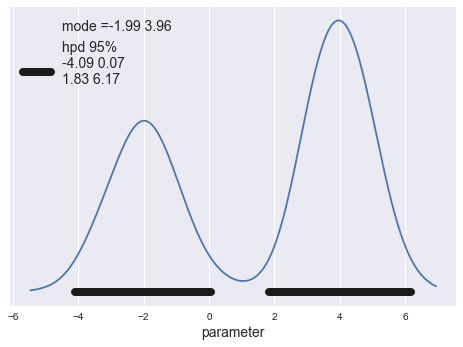

In [6]:
plot_post(mix_norm, roundto=2, cred_mass=0.95);  # el valor por defecto de cred_mass, pero esto es solo una convención sin ninguna justificación razonable.

Esta función nos devuelve un HPD (95%) que está compuesto por dos sub-intervalos, además nos devuelve dos modos, uno para cada sub-intervalo.

Ahora que estamos aprendiendo que es un HPD y antes de que automaticemos el concepto conviene aclarar un par de puntos. 

1. **La elección automática de 95% (o cualquier otro valor) es totalmente arbitraria**. En principio no hay ninguna razón para pensar que describir el _a posteriori_ con un HPD 95 sea mejor que describirlo con un HPD 98. La razón es simplemenente un accidente histórico originado en la estadística frecuentista en donde se fija un umbral (igualmente arbitrario) de _significancia estadística_ de (usualmente) 5%, el concepto de _significancia estadística_ no es importante en estadística Bayesiana.

2. **Un intervalo de credibilidad (que es Bayesiano) no es lo mismo que un intervalo de confianza (que es frecuentista)**. Para complicar las cosas a veces los términos se usan indistintamente y a veces, bajo ciertas condiciones, los límites del intervalo entre ambos intervalos coincide. Un intervalo de confianza es un análogo del intervalo de credibilidad. Este se construye de tal forma que lo único que es posible afirmar es que hay una probabilidad $x$ (usualmente también 95%) de que el $x\%$ por ciento de los intervalos contenga el valor real del parámetro. Contra-intuitivamente esto no es lo mismo que decir que un intervalo en particular tiene una probabilidad de $x\%$ de contener el parámetro (esto sería la definición de un intervalo de credibilidad, que es Bayesiano). De hecho un intervalo de confianza en particular contiene o no contiene al valor, la teoría frecuentista no nos deja hablar de probabilidades de los parámetros, ya que estos tienen valores fijos. Si no queda clara la diferencia no te hagas problema, la diferencia entre estos dos conceptos suele ser tan difícil de entender que en la práctica estudiantes y científicos por igual interpretan los intervalos de confianza (frecuentistas) como intervalos de credibilidad (Bayesianos). Bien, entonces un intervalo de credibilidad Bayesiano me permite asegurar que dicho intervalo tiene un probabilidad (digamos, _solo para seguir la tradición_, del 95%) de contener el valor real del parámetro. Si y no, si en el sentido teórico por lo cual es correcto enunciarlo de esa forma, pero hay que tener cuidado que en la práctica la probabilidad podría ser distinta (en general menor), la discrepancia entre teoría y _realidad_ se encuentra en las simplificaciones de nuestro modelo.

### ¿Está nuestra moneda sesgada?

Hay veces que no basta con describir el _a posteriori_ si no que se espera que tomemos algún tipo de decisión basados en nuestra inferencia. Por ejemplo responder si la moneda está sesgada, cuando consideramos que $\theta=0.5$ equivale a no-sesgada. Intuitivamente lo que debemos hacer en este caso es evaluar si el HPD contiene o no el valor que nos interesa.

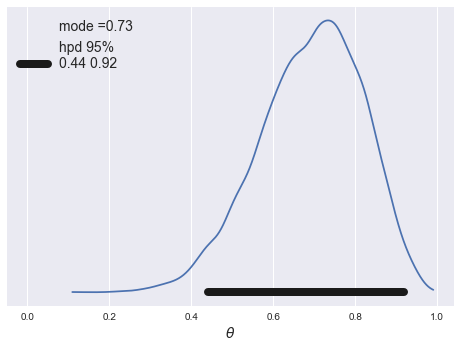

In [7]:
plot_post(post, xlab=r'$\theta$', roundto=2);  # asumamos que post es nuestro a posteriori

En este caso vemos que el valor más probable para $\theta$ (dados nuestro datos y nuestro modelo) es 0,73 y que el HPD va de 0.44 a 0.92, es decir el intervalo de credibilidad incluye a 0.5. Entonces una posible respuesta sería decir que al parecer lo más probable es que la moneda esté sesgada hacia caras, pero que un valor de 0.5 no puede ser totalmente excluido (según los datos y el modelo).

Si bien esta respuesta puede parecer algo ambigua, en general suele ser una buena idea en ciencias ya que incluye la información de todo el _a posteriori_, el HPD y nuestra interpretación acompañada posiblemente de una discusión sobre las consecuencias y/o justificaciones de tal interpretación. Sin embargo, en otros contextos puede que lo que se necesite sea una decisión algo más tajante. Si ese es el caso existen al menos dos estrategias para hacerlo.

#### ROPE

La primer estrategia consiste en definir lo que conoce como _región de equivalencia práctica_ o ROPE (_Region Of Practical Equivalence_). La razón de definir una ROPE es que es muy difícil que en la práctica obtengamos exactamente el valor 0.5 (estrictamente la probabilidad de un valor exactamente 0.5 es 0). Es por ello, que podríamos definir, para el caso de la moneda, que la ROPE va de 0,45 a 0,55 (en principio no tiene por que ser simétrico). El rango de una ROPE es contexto-dependiente y no hay una regla general para construirlo, todo dependerá del problema a resolver.

Ya establecido la ROPE podemos usar las dos siguientes reglas para tomar una decisión:

* El valor de un parámetro es considerado improbable (o rechazado) si la totalidad de la ROPE cae por fuera del HPD 95% del parámetro en cuestión.

* El valor de un parámetro es aceptado si la ROPE contiene por completo al HPD 95% del parámetro en cuestión.

Usando *plot_post*, podemos definir una ROPE e indicar un _valor de comparación_ (0.5 en este caso).

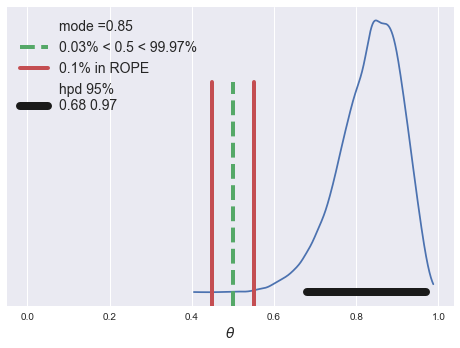

In [8]:
plot_post(dist.rvs(20, 4, size=10000), xlab=r'$\theta$', roundto=2, ROPE=[0.45, 0.55], comp_val=0.5);

*plot_post* nos muestra la ROPE en rojo y en la leyenda el porcentaje de la distribución que cae dentro de la ROPE. En verde nos muestra el _valor de comparación_ y en la leyenda el porcentaje de la distribución que está por debajo y por encima de este valor.

En este caso dado que no hay solapamiento entre la ROPE y el HPD 95% podemos decir, según la primer regla antes descripta, que a los fines prácticos determinamos que nuestra moneda está sesgada (un análisis equivalente pero en términos frecuentistas concluiría que _rechazamos la hipótesis nula_).

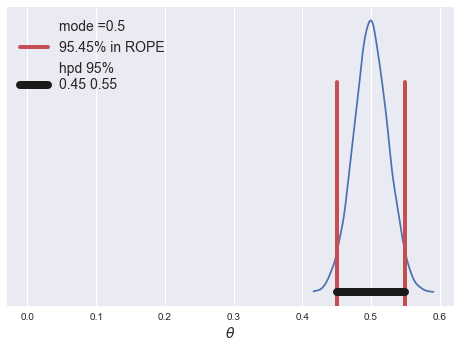

In [9]:
plot_post(dist.rvs(200, 200, size=10000), xlab=r'$\theta$', roundto=2, ROPE=[0.45, 0.55]);

En este caso, y siguiendo la segunda regla, dado que la ROPE contiene por completo al HPD 95% podemos afirmar que, a los fines prácticos, la moneda está no sesgada (un análisis equivalente pero en términos frecuentistas concluiría que _fallamos en rechazar la hipótesis nula_, ojo que esto no es lo mismo que aceptar).

¿Qué sucede cuando el HPD y la ROPE se superponen pero la ROPE solo contiene una porción del HPD? En este caso y dado que no se cumplen ninguna de las 2 reglas arriba especificas, debemos concluir (bajo esas reglas), que no es posible ni afirmar ni negar que la moneda esté sesgada y que probablente necesitemos de más datos.

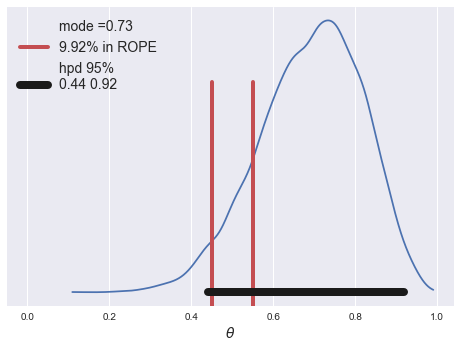

In [10]:
plot_post(post, xlab=r'$\theta$', roundto=2, ROPE=[0.45, 0.55]);

Los limites de la ROPE son críticos para este tipo de análisis, y no puede ser elegidos a la ligera si no que deben reflejar el conocimiento que se tenga en el área de estudio y los objetivos de la investigación. Además los criterios y justificaciones con los que se decide la ROPE deben ser explicitados y no _escondidos_. 

Para una discusión más detallada del uso de la ROPE es posible leer el capítulo 12 de la segunda edición de _Doing Bayesian Data analysis_ (y las referencias allí listadas). Además, en ese capítulo encontrarán una descripción de como realizar el equivalente Bayesiano de la popular técnica frecuentista de _prueba de hipótesis nula_, como también una crítica a las prueba de hipótesis nula  (Bayesianas y no-bayesianas) y alternativas superadoras. En este curso no discutiremos las pruebas de hipótesis nula, en cambio nos focalizaremos en discutir la estimación de parámetros.

#### Funciones de pérdida

Otra posibilidad para ayudar en la toma de decisiones a partir del _a posteriori_ es el uso de las [funciones de pérdida](https://en.wikipedia.org/wiki/Loss_function). Este tipo de funciones vienen a formalizar la frase de Keynes _Prefiero estar vagamente en lo correcto que precisamente equivocado_. Es decir, la precisión con la que se logra una medida es importante, pero tambien es importante contemplar que sucede si nos equivocamos. Las funciones de pérdida estiman el costo relacionado con establecer que un parámetro vale $a$ cuando en realidad vale $b$. Es decir permiten describir el costo asociado al tomar una decisión basado en una estimación puntual. En muchos problemas el costo de tomar una decisión es asimétrico, por ejemplo si estamos tratando de establecer que un curso de agua está contaminado no es lo mismo equivocarse al asegurar que si lo está y suspender por lo tanto el consumo humano de ese recurso (al menos hasta que se realicen otras pruebas) que asegurar que no lo está, provocando enfermedades o la muerte de personas. El campo que estudia las funciones de perdida se llama _Teoría de Decisión_ y se ha escrito mucho al respecto pero en este curso no veremos como usarlas. En cambio nos focalizaremos en describir el _a posteriori_ usando medias y modas, HPDs y KDE de las distribuciones marginales de cada parámetro. Estas formas de resumir y comunicar el _a posteriori_ son las más comunmente usadas en ciencias.

Quienes estén interesadas en continuar leyendo más de este tema pueden empezar por el capítulo 5 de [Bayesian methods for hackers](http://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter5_LossFunctions/Chapter5.ipynb).

### Pruebas predictivas _a posteriori_

Las pruebas predictivas _a posteriori_ son una forma de evaluar el modelo. Una vez obtenido el modelo Bayesiano se usa el _a posteriori_ para generar datos $\boldsymbol{\tilde{y}}$, es decir datos predichos condicionados por los valores estimados de $\boldsymbol{\theta}$ y por los datos ya observados $\boldsymbol{y}$. 

$$p(\boldsymbol{\tilde{y}} | \boldsymbol{y}) = \int p(\boldsymbol{\tilde{y}}| \boldsymbol{\theta}) p(\boldsymbol{\theta}|\boldsymbol{y}) d\boldsymbol{\theta}$$ 

Los datos generados son predictivos ya que son los datos que se esperaría ver por ejemplo en un futuro experimento, es decir son variables no observadas pero potencialmente observables. La prueba consiste en comparar los datos observados con los datos predichos a partir del _a posteriori_. 

Las pruebas predictivas _a posteriori_ son pruebas de autoconsistencia. Este ejercicio nos permite evaluar si el modelo es razonable, la idea general no es determinar si un modelo es _correcto_ o no lo es ya que como dijo George Box _"todos los modelos están equivocados, pero algunos son útiles"_. El grado de confianza en la _verosimilitud_ de los modelos ciertamente es distinta entre practicantes de distintas disciplinas científicas, en disciplinas como física cuando se estudian sistemas relativamente simples bajo condiciones experimentales extremadamente controladas y haciendo uso de _teorías fuertes_, es probable que se le asigne un alto grado de confianza a ciertos modelos. Pero esto no suele ser cierto en disciplinas como ciencias sociales o biología (aunque sospecho que la variabilidad encontrada en biología es muy alta!). En el caso de contar _a prioris_ muy informativos la evaluación de un modelo también puede ser usado para evaluar si los propios datos son razonables, indicando que tal vez sea necesario conseguir nuevos datos o revisar como se obtuvieron los datos o como se procesaron. 

En definitiva la principal utilidad de las pruebas predictivas _a posteriori_ debería ser el permitirnos dar una segunda mirada, crítica, al modelo y tratar de entender la razón de discrepancias sistemáticas (si las hubiera), estas discrepancias nos pueden llevar a entender mejor los límites del modelo, abandonar el modelo por completo o tal vez mejorarlo.

Si bien se han desarrollado métodos _formales_ o _cuantitativos_ para realizar pruebas predictivas _a posteriori_, una aproximación que suele ser más informativa y simple de interpretar es realizar gráficas, que es lo que iremos viendo en los próximos capítulos.

## Para seguir leyendo

* Capítulos 1 y 2 [Data Analysis: A Bayesian Tutorial](http://www.amazon.com/Data-Analysis-A-Bayesian-Tutorial/dp/0198568320) de Devinderjit Sivia & John Skilling
* Capítulos 2, 4 - 6 [Doing Bayesian Data Analysis (2 edición)](www.amazon.com/gp/product/0124058884) de John Kruschke.
* Capítulos 1-3 de [Statistical Rethinking](https://www.crcpress.com/Statistical-Rethinking-A-Bayesian-Course-with-Examples-in-R-and-Stan/McElreath/9781482253443) de Richard McElreath.
* Capítulos 1-4 de [Think Bayesian](http://greenteapress.com/thinkbayes/) de Allen B. Downey 
* Capítulos 1 y 2 de [Bayesian Data Analysis](www.amazon.com/Bayesian-Analysis-Chapman-Statistical-Science/dp/1439840954) de Andrew Gelman



* Material online con tópicos Bayesianos:
    * [Publishable Stuff](http://sumsar.net/)
    * [Probably Overthinking It](http://allendowney.blogspot.com.ar/)
    * [Pythonic Perambulations](http://jakevdp.github.io./)
    * [While My MCMC Gently Samples](http://twiecki.github.io/)
    * [Count Bayesie](https://www.countbayesie.com/)
    * [Bayesian Methods for Hackers](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/#contents)


* Las plantillas utilizadas para generar los diagramas de Kruschke, fueron creadas por [Rasmus Bååth's](http://sumsar.net/blog/2013/10/diy-kruschke-style-diagrams/)

In [11]:
import sys, IPython, scipy, matplotlib, platform
print("Esta notebook fue creada en una computadora %s corriendo %s y usando:\nPython %s\nJupyter %s\nNumPy %s\nSciPy %s\nMatplotlib %s\nSeaborn %s\n" % (platform.machine(), ' '.join(platform.linux_distribution()[:2]), sys.version[:5], IPython.__version__, np.__version__, scipy.__version__, matplotlib.__version__, sns.__version__))

Esta notebook fue creada en una computadora x86_64 corriendo debian stretch/sid y usando:
Python 3.5.3
Jupyter 5.3.0
NumPy 1.12.1
SciPy 0.19.0
Matplotlib 2.0.2
Seaborn 0.7.1

